Text(0.5, 1.0, 'Maximum absolute error: 10.0169')

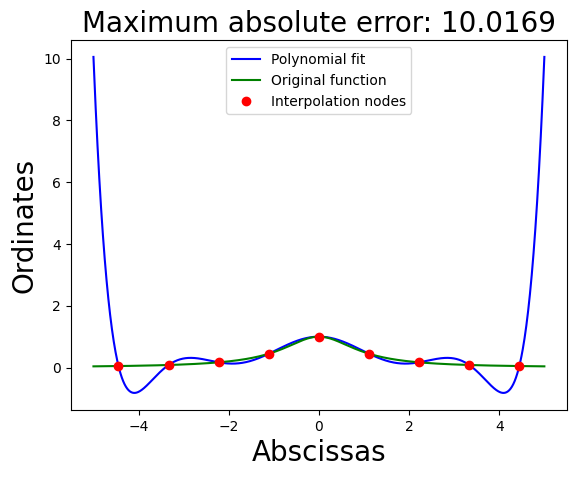

In [156]:
from pylab import *
ion()
from scipy.linalg import solve

    
def PolyLagrange(absc, ordi, x):
    """Evaluates at x the polynomial passing through the points having
abscissas 'absc' and ordinates 'ordi' using Lagrange's method.

Input:

absc, ordi: 1D arrays or iterable python objects that convert to 1D
            array. They must have the same length.

x: 1D array or a number

Output: 1D array of same length as x, or a number if x is a number.

    """
    absc = array(absc)
    ordi = array(ordi)
    if shape(absc) != shape(ordi):
        raise ValueError("Abscissas and ordinates have different length!")
    if len(shape(absc)) != 1:
        raise ValueError("Abscissas and ordinates must be 1D objects!")
    Npts = len(absc)
    product = ones((Npts,) + shape(x))
    for i in range(Npts):
        for j in range(Npts):
            if i == j : continue
            product[i] *= (x-absc[j])/(absc[i]-absc[j])
    return dot(ordi, product)

#------------------------------------------------------------
# Hints for exercise n.3
def SplineCoefficients(absc, ordi):
    """Computes a matric containing the coefficients of the polynomials
forming a set of natural cubic splines interpolating the points (absc, ordi).

Input:

absc, ordi: 1D arrays or iterable python objects that convert to 1D
            array. They must have the same length. absc must be ordered
            in growing order.

Output: 

A matrix with four columns and as many rows as the elements in absc
minus one. If c0, c1, c2, c3 are the elements along the i-th row, the
corresponding interpolating polynomial is 

S_i(x)=c0 + c1*(x - absc[i]) + c2*(x - absc[i])**2 + c3*(x - absc[i])**3

    """
    #Delete 'pass' and put here your code.
    #To solve eq. 3.24 in the book, use
    #    c = solve(A,K)
    #where A is the matrix containing the deltas and K is the vector
    #of the know solutions (you must prepare them both).
    #'solve' has been imported at the beginning of this code.
    pass
    

def __evaluate_spline(coeff, absc, x):
    """Don't use this directly. Call 'evaluate_spline', instead."""
    #Delete 'pass' and put here your code.  It might useful to know
    #that, if a is ordered in growing order, as it should be, then
    #  'searchsorted(a, x)'
    #returns the index of the smallest element in a which is larger
    #than x
    pass


def evaluate_spline(coeff, absc, x):
    """Evaluates at x the the natural spline interpolant.

Input:

coeff:  matrix containinig the coefficients of the cubic interpolants.
        This is the output of 'SplineCoefficients'.

absc:   the same abscissas passed to 'SplineCoefficients' to compute 'coeff'.

x:      1D array or a number

Output: 1D array of same length as x, or a number if x is a number.

    """
    # x is a number
    if shape(x)==():
        p = __evaluate_spline(coeff, absc, x)
    # x is a 1D array, or list, or tuple
    else:
        x = array(x)
        p = zeros_like(x)
        for i in range(len(x)):
            p[i] = __evaluate_spline(coeff, absc, x[i])
    return p


#------------------------------------------------------------



ion()
function = lambda x: 1./(1+x**2)
interval = [-5, 5]
Npts = 9
L = interval[1]-interval[0]
x = linspace(interval[0], interval[1], 1001)


# constant interval abscissas
a = linspace(interval[0] + L/Npts/2, interval[1] - L/Npts/2 , Npts)
o = function(a)
p = PolyLagrange(a, o, x)

figure(1)
plot(x, p,           'b-',
     x, function(x), 'g-',
     a, o,           'or')
xlabel("Abscissas", fontsize=20)
ylabel("Ordinates", fontsize=20)
legend(["Polynomial fit", "Original function", "Interpolation nodes"],
       loc="upper center")
title("Maximum absolute error: {:7.4f}".format(amax(fabs(p - function(x)))), fontsize=20 )


In [168]:
def get_Chebishev_zeros(n: int):
    import math
    result = []
    for i in range(1, n + 1):
        result.append(math.cos(((2 * i - 1) * math.pi) / (2 * n)))
    
    return result

In [169]:
r = get_Chebishev_zeros(n=10)

In [170]:
r

[0.9876883405951378,
 0.8910065241883679,
 0.7071067811865476,
 0.45399049973954686,
 0.15643446504023092,
 -0.1564344650402306,
 -0.45399049973954675,
 -0.7071067811865475,
 -0.8910065241883678,
 -0.9876883405951377]

To rescale the variable of a function defined on the interval $[-1, 1]$ so that it is defined on a new interval $[a, b]$, we can use a linear transformation. The idea is to map the old interval $[-1, 1]$ to the new interval $[a, b]$ by finding a function that takes any $x$ in $[-1, 1]$ and gives a corresponding value in $[a, b]$.

The transformation can be achieved using the formula:
$$
x' = \frac{b-a}{2} x + \frac{a+b}{2}
$$
Here, $x'$ is the new variable corresponding to $x$, and $x$ is the original variable in the interval $[-1, 1]$. This formula linearly transforms $x$ from the interval $[-1, 1]$ to $x'$ in the interval $[a, b]$.center of $[-1, 1]$) to the center of $[a, b]$, which is $\frac{a+b}{2}$.

This linear transformation ensures that $x = -1$ maps to $x' = a$ and $x = 1$ maps to $x' = b$, effectively rescaling and repositioning the function $f(x)$ from the interval $[-1, 1]$ to the interval $[a, b]$.

To calculate the result backward, we have

$$
x = (\frac{2}{b - a}) \cdot (x' - \frac{a + b}{2})
$$

In [175]:
def get_Chebishev_zeros_scaled(a: int, b: int, n: int):
    raw_zeros = get_Chebishev_zeros(n = n)
    return [((b - a) / 2) * i + ((a + b) / 2) for i in raw_zeros]

In [176]:
get_Chebishev_zeros_scaled(a = -5, b = 5, n = 5)

[4.755282581475767,
 2.938926261462366,
 3.061616997868383e-16,
 -2.938926261462365,
 -4.755282581475767]